In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


In [34]:
df = pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [36]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [37]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [38]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [39]:
df['total_score'] = (df['math score'] + df['reading score'] + df['writing score'])/3

In [40]:
df.describe()

,math score,reading score,writing score,total_score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667
std,15.16308,14.600192,15.195657,14.257326
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.333333
50%,66.00000,70.000000,69.000000,68.333333
75%,77.00000,79.000000,79.000000,77.666667
max,100.00000,100.000000,100.000000,100.000000


In [41]:
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# newdf = df.copy()
# newdf['test preparation course'] = encoder.fit_transform(df['test preparation course'])
# newdf['gender'] = encoder.fit_transform(df['gender'])
# newdf['lunch'] = encoder.fit_transform(df['lunch'])
# df = df.drop(['math score', 'reading score','writing score'],axis = 1)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   total_score                  1000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [43]:
# from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

def labelEncode(newdf):
    newdf= newdf.copy()
    
    encoder = LabelEncoder()
    
    for i in ['race/ethnicity', 'parental level of education', 'test preparation course', 'gender', 'lunch']:
        newdf[i] = encoder.fit_transform(newdf[i])
    return newdf

# def onehotencode(newdf, columns, prefixes):
#     newdf = newdf.copy()
    
#     for column, prefix in zip(columns, prefixes):
#         dummies = pd.get_dummies(newdf[column], prefix = prefix)
#         newdf = pd.concat([newdf, dummies], axis = 1)
#         newdf = newdf.drop(column, axis = 1)
        
#     return newdf

# ndf = onehotencode(newdf, columns = ['race/ethnicity', 'parental level of education'],
#                   prefixes = ['Re', 'PE'])

In [44]:
ndf = labelEncode(df)

In [45]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   int64  
 1   race/ethnicity               1000 non-null   int64  
 2   parental level of education  1000 non-null   int64  
 3   lunch                        1000 non-null   int64  
 4   test preparation course      1000 non-null   int64  
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   total_score                  1000 non-null   float64
dtypes: float64(1), int64(8)
memory usage: 70.4 KB


In [46]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total_score'],
      dtype='object')

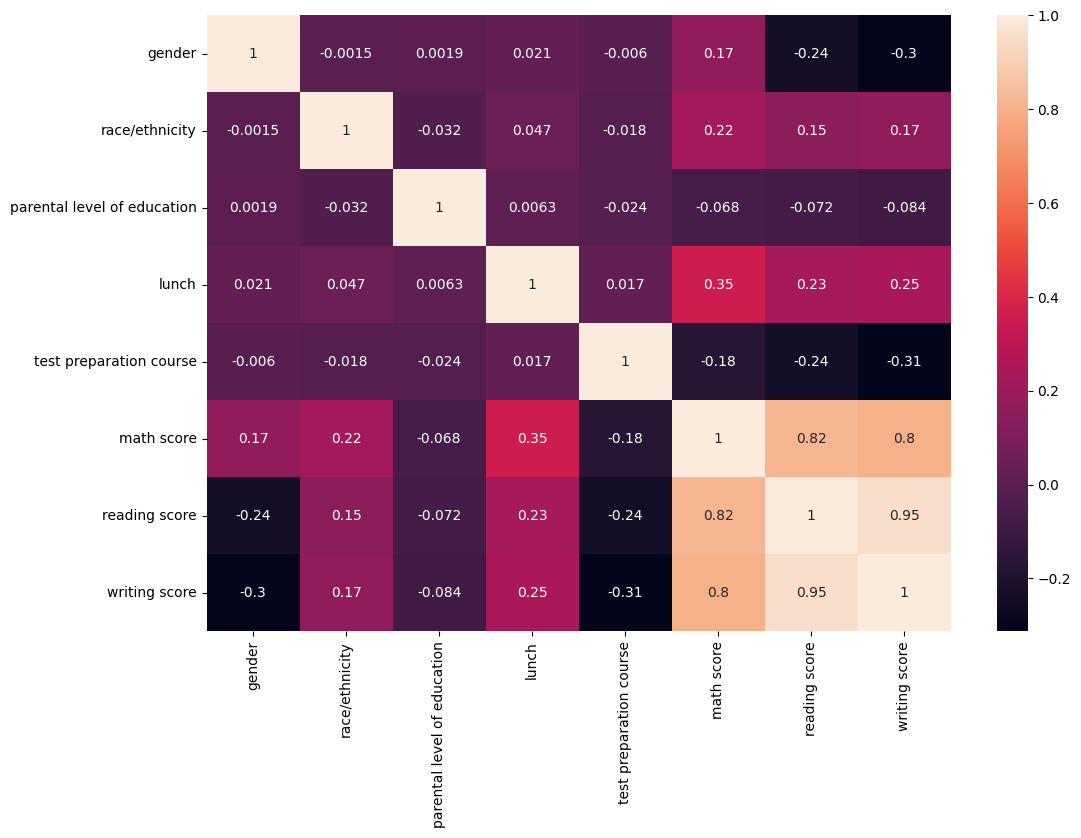

In [57]:
ndf_corr = ndf[['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score']].dropna().corr()

plt.figure(figsize = (12, 8))
sns.heatmap(ndf_corr, annot = True)
plt.show()

In [48]:
from sklearn.model_selection import train_test_split

X = ndf.drop('total_score', axis = 1)
y = ndf['total_score']

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# scaled_X = scaler.fit_transform(X)
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [51]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   float64
 1   race/ethnicity               1000 non-null   float64
 2   parental level of education  1000 non-null   float64
 3   lunch                        1000 non-null   float64
 4   test preparation course      1000 non-null   float64
 5   math score                   1000 non-null   float64
 6   reading score                1000 non-null   float64
 7   writing score                1000 non-null   float64
dtypes: float64(8)
memory usage: 62.6 KB


In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# model = LinearRegression()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# print("r2 score : ", r2_score(y_pred, y_test))
# # print("model score : ", score(X_test, y_test))
# print(" ")

In [53]:
# model = SVM()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# print("r2 score : ", r2_score(y_pred, y_test))
# print("model score : ", score(X_test, y_test))
# print(" ")

In [54]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("r2 score : ", r2_score(y_pred, y_test))
# print("model score : ", score(X_test, y_test))
print(" ")

r2 score :  0.9862260017669312
 


In [55]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("r2 score : ", r2_score(y_pred, y_test))
# print("model score : ", score(X_test, y_test))
print(" ")

r2 score :  0.9947597887777668
 


In [58]:
data = ndf[['math score', 'reading score','writing score']]

In [59]:
data

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [60]:
y_math = data['math score']
y_read = data['reading score']
y_write = data['writing score']

In [61]:
data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [66]:
X_math = data.drop('math score', axis = 1)
X_read = data.drop('reading score', axis = 1)
X_write = data.drop('writing score', axis = 1)

In [65]:
X_math

,reading score,writing score
0,0.193999,0.391492
1,1.427476,1.313269
2,1.770109,1.642475
3,-0.833899,-1.583744
4,0.605158,0.457333
...,...,...
995,2.044215,1.774157
996,-0.970952,-0.859491
997,0.125472,-0.201079
998,0.605158,0.589015


In [67]:
X_train_math, X_test_math, y_train_math, y_test_math = train_test_split(X_math, y_math, test_size = 0.3, random_state = 123)
X_train_read, X_test_read, y_train_read, y_test_read = train_test_split(X_read, y_read, test_size = 0.3, random_state = 123)
X_train_write, X_test_write, y_train_write, y_test_write = train_test_split(X_write, y_write, test_size = 0.3, random_state = 123)

In [82]:
print("Math predictions")

model = LinearRegression()
model.fit(X_train_math, y_train_math)
y_pred = model.predict(X_test_math)
print("r2 score : ", r2_score(y_pred, y_test_math))
print("model score : ", model.score(X_test_math, y_test_math))
print(" ")

model = SVR()
model.fit(X_train_math, y_train_math)
y_pred = model.predict(X_test_math)
print("r2 score : ", r2_score(y_pred, y_test_math))
print("model score : ", model.score(X_test_math, y_test_math))
print(" ")

model = DecisionTreeRegressor()
model.fit(X_train_math, y_train_math)
y_pred = model.predict(X_test_math)
print("r2 score : ", r2_score(y_pred, y_test_math))
print("model score : ", model.score(X_test_math, y_test_math))
print(" ")

model = RandomForestRegressor()
model.fit(X_train_math, y_train_math)
y_pred = model.predict(X_test_math)
print("r2 score : ", r2_score(y_pred, y_test_math))
print("model score : ", model.score(X_test_math, y_test_math))
print(" ")

Math predictions
r2 score :  0.5541580217091556
model score :  0.7064092555655415
 
r2 score :  -0.01248640882333052
model score :  0.6052979031047614
 
r2 score :  0.42661380245011016
model score :  0.4323956949026957
 
r2 score :  0.5066661468300073
model score :  0.6019788843749772
 


In [81]:
print("Reading predictions")

model = LinearRegression()
model.fit(X_train_read, y_train_read)
y_pred = model.predict(X_test_read)
print("r2 score : ", r2_score(y_pred, y_test_read))
print("model score : ", model.score(X_test_read, y_test_read))
print(" ")

model = SVR()
model.fit(X_train_read, y_train_read)
y_pred = model.predict(X_test_read)
print("r2 score : ", r2_score(y_pred, y_test_read))
print("model score : ", model.score(X_test_read, y_test_read))
print(" ")

model = DecisionTreeRegressor()
model.fit(X_train_read, y_train_read)
y_pred = model.predict(X_test_read)
print("r2 score : ", r2_score(y_pred, y_test_read))
print("model score : ", model.score(X_test_read, y_test_read))
print(" ")

model = RandomForestRegressor()
model.fit(X_train_read, y_train_read)
y_pred = model.predict(X_test_read)
print("r2 score : ", r2_score(y_pred, y_test_read))
print("model score : ", model.score(X_test_read, y_test_read))
print(" ")

Reading predictions
r2 score :  0.9175188881076465
model score :  0.9207622836511835
 
r2 score :  0.7523732538803323
model score :  0.8263098419360094
 
r2 score :  0.8581804242863259
model score :  0.856459750480872
 
r2 score :  0.8957247368433049
model score :  0.8991383341678012
 


In [80]:
print("Writing predictions")

model = LinearRegression()
model.fit(X_train_write, y_train_write)
y_pred = model.predict(X_test_write)
print("r2 score : ", r2_score(y_pred, y_test_write))
print("model score : ", model.score(X_test_write, y_test_write))
print(" ")

model = SVR()
model.fit(X_train_write, y_train_write)
y_pred = model.predict(X_test_write)
print("r2 score : ", r2_score(y_pred, y_test_write))
print("model score : ", model.score(X_test_write, y_test_write))
print(" ")

model = DecisionTreeRegressor()
model.fit(X_train_write, y_train_write)
y_pred = model.predict(X_test_write)
print("r2 score : ", r2_score(y_pred, y_test_write))
print("model score : ", model.score(X_test_write, y_test_write))
print(" ")

model = RandomForestRegressor()
model.fit(X_train_write, y_train_write)
y_pred = model.predict(X_test_write)
print("r2 score : ", r2_score(y_pred, y_test_write))
print("model score : ", model.score(X_test_write, y_test_write))
print(" ")

Writing predictions
r2 score :  0.9023478894078029
model score :  0.9141278133486234
 
r2 score :  0.7140338323783156
model score :  0.8169006987755896
 
r2 score :  0.8399636376594248
model score :  0.8487096510206199
 
r2 score :  0.8819148296910767
model score :  0.8943864854094494
 
